### Spam classifier by using Naive Bayes method

In [65]:
from urllib.request import urlopen   

# file link from UCI Machine repository, SMS Spam Collection Data Set 
urllink = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'

# open and save the zip file onto computer
url = urlopen(urllink)
output = open(zipName, 'wb')    # note the flag:  "wb"        
output.write(url.read())
output.close()

In [66]:
from zipfile import ZipFile

# read zipfile and extract, then close
zipName = 'zipFile.zip'
zipfile = ZipFile(zipName,'r')
zipfile.extractall()
zipfile.close()

In [67]:
import pandas as pd
import os

# read file
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=('class','message'))

# pandas version 0.18.1 takes zip files
# but in the zip file there are two files, but pandas need one file to execute
#df = pd.read_csv(zipName, sep='\t', header=None, names=('class','message')) 

# if keeping on disk the zip file is not wanted, then:
os.remove(zipName)   # remove the copy of the zipfile on disk

In [68]:
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
class      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB
None
  class                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


In [69]:
from sklearn.feature_extraction.text import CountVectorizer

# tokonize/convert all individual words into numbers
# then count how many time each word occurs
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(df['message'].values)

In [70]:
from sklearn.naive_bayes import MultinomialNB

# MultinomialNB needs two inputs, actual data (class) and targets (counts)
classifier = MultinomialNB()
targets = df['class'].values
classifier.fit(counts, targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [71]:
# giving some texts to the model for testing
examples =['Free poker now!!!', 
           'Hello Rob, how are you doing?',
           'WINNER, Join us!', 
           'free call today'
          ]

# convert each text into list of words and its frequency, then predict
example_counts =vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
print(predictions)

['spam' 'ham' 'spam' 'spam']


In [72]:
# lets plot mostly used words in spam & ham mails
from wordcloud import WordCloud

spam_words = ' '.join(list(df[df['class'] == 'spam']['message']))
spam_wc = WordCloud(width=512,height=512).generate(spam_words)

ham_words = ' '.join(list(df[df['class'] == 'ham']['message']))
ham_wc = WordCloud(width=512,height=512).generate(ham_words)

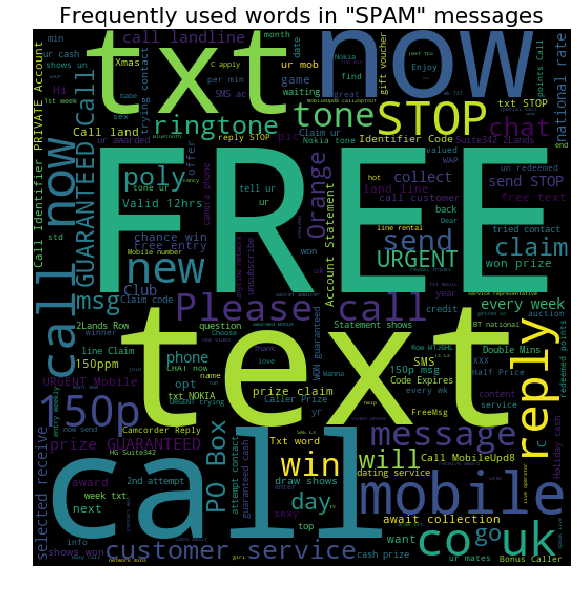

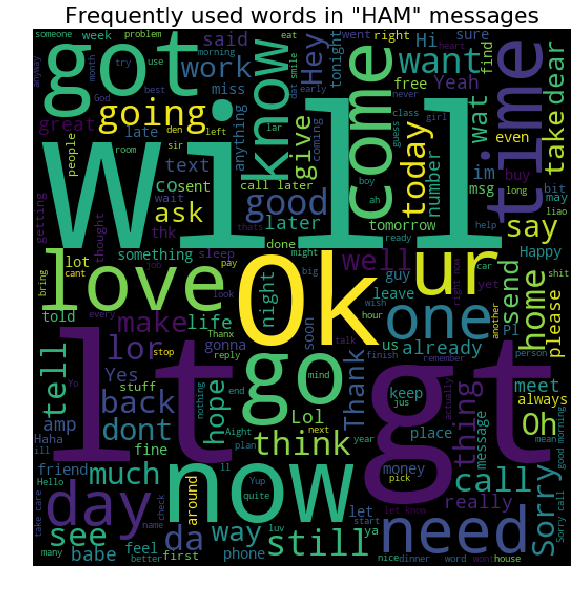

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
plt.title('Frequently used words in "SPAM" messages',  fontsize=22)
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

plt.figure(figsize = (10,8))
plt.title('Frequently used words in "HAM" messages',  fontsize=22)
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()